<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.976 · Anàlisi de grafs i xarxes socials</p>
<p style="margin: 0; text-align:right;">Màster universitari de Ciència de Dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Generació aleatòria de xarxes sintètiques

Aquest notebook explora els algorismes de generació de grafs sintètics. 

En primer lloc, es presenten les funcions de generació de grafs que permeten generar xarxes segons el model Erdős-Rényi, i es repassen i observen experimentalment les propietats més importants d'aquestes xarxes. En segon lloc, s'exposen les funcions de generació de grafs basades en models amb distribució de graus específica i les seves propietats principals, així com també la funció que ens ofereix networkx per a comprovar si una seqüència de graus és gràfica o no. En tercer lloc, revisem les funcions de generació de xarxes que imiten xarxes socials, mostrant propietats de món petit o lliures d'escala.

A continuació, s'exposen alguns detalls comuns a les funcions de generació de grafs aleatoris vistes en el notebook, que permeten reproduir l'execució dels algorismes de generació de grafs o bé generar grafs dirigits.

Finalment, es repassen algunes funcions de generació de grafs deterministes que incorpora networkx i que permeten treballar amb grafs populars en el camp de l'anàlisi de xarxes.

Recordeu que podeu anar executant els exemples que s'inclouen en els notebooks per a reproduir-los i obtenir-ne els resultats. A més, us animem a modificar el codi dels exemples i executar les vostres modificacions, per anar explorant tot el potencial de les llibreries que es presenten en els botebooks i els algorismes que es detallen.

## 1. El model Erdős-Rényi

La llibreria networkx incorpora les dues variants del model Erdős-Rényi que es presenten en el llibre *Análisis de datos de redes sociales*: el model de graf aleatori uniforme i el model de Gilbert. A més, per a cadascuna de les variants, disposa també de diferents implementacions, que estan optimitzades per millorar l'eficiència de la generació i el maneig de certs tipus de grafs.

### 1.1 El model del graf aleatori uniforme 

El model del graf aleatori uniforme selecciona un graf a l'atzar, de manera equiprobable, d'entre tots els grafs que tenen un cert nombre de nodes $n$ i d'arestes $m$. 

Les funcions [`gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) y [`dense_gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.dense_gnm_random_graph.html#networkx.generators.random_graphs.dense_gnm_random_graph) de networkx permeten generar grafs aleatoris amb aquest model. Ambdues funcions necessiten dos paràmetres obligatoris, `n` i `m`, que especifiquen el nombre de nodes i d'arestes del graf que es vol generar, respectivament.

En primer lloc, veurem un exemple senzill de l'ús d'una d'aquestes funcions per a generar un graf aleatori.

In [5]:
# Activem matplotlib i indiquem que es mostrin els plots en el mateix notebook
# usant un magic command de Jupyter
%matplotlib inline

# Importem networkx, pyplot i numpy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

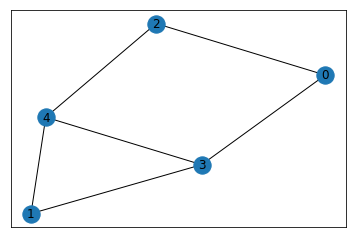

In [6]:
# Generem un graf aleatori amb 5 nodes i 6 arestes
g = nx.gnm_random_graph(n=5, m=6)

# Visualitzem el graf generat
nx.draw_networkx(g)

#### 1.1.1 Propietats del model del graf aleatori uniforme 

Comprovem ara les propietats d'aquest model que hem vist en el capítol 5 del llibre *Análisis de datos de redes sociales*. Sabem que el nombre de possibles arestes d'un graf de $n$ nodes està determinat per l'expressió:
$${n\choose 2}$$

que representa el nombre de maneres possibles de triar un parell de nodes d'un graf de $n$ nodes. Una alternativa per a visualitzar el nombre d'arestes possibles d'un graf és generar i visualitzar el graf complet que té el mateix nombre de nodes. Òbviament, aquesta solució només és viable per a grafs molt petits, però ens pot ser útil per a veure gràficament quantes arestes pot tenir, com a màxim, un graf.

El nombre de possibles arestes d'un graf de 4 nodes és: 6


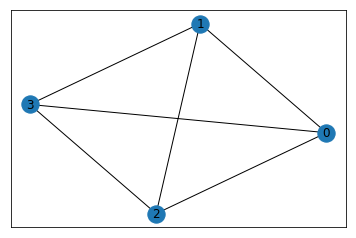

In [7]:
# Creem un graf complet de 4 nodes
g = nx.complete_graph(n=4)

# Visualitzem el graf
nx.draw_networkx(g)

# Mostrem el nombre d'arestes
print("El nombre de possibles arestes d'un graf de 4 nodes és: {}".format(g.number_of_edges()))

Comprovem que el resultat coincideix amb la fórmula:

In [8]:
# Importem factorial de la llibreria math
from math import factorial

# Creem una funció per a calcular coeficients binomials
def binomial_coefficient(n, k):
    """
    Calcula el coeficiente binomial:
    n! / ( k! (n-k)! )
    """
    return factorial(n) // factorial(k) // factorial(n-k)

# Cridem la funció anterior per a calcular el nombre de possibles arestes
# d'un graf de 4 nodes
m = binomial_coefficient(4, 2)
print("El nombre de possibles arestes d'un graf de 4 nodes és: {}".format(m))

El nombre de possibles arestes d'un graf de 4 nodes és: 6


A partir del nombre de possibles arestes del graf, podem calcular el nombre de grafs diferents amb $n$  nodes i $m$ arestes:

$$\#\{G_{ru}(n, m)\} = {{{n\choose 2} }\choose m}$$ 

que representa el nombre de maneres possibles de triar $m$ arestes d'entre les possibles.

Per a veure el funcionament correcte de la funció [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph), crearem una funció que generi grafs aleatoris repetidament i desarem el nombre de grafs diferents que es generen, així com també el nombre de vegades que s'ha generat cada graf. D'aquesta manera, podrem comprovar que la funció està generant tots els grafs possibles i, a més, veurem que ho està fent de manera aleatòria uniforme. 

In [9]:
def generate_gnm_graphs(n, m, num_its=1000, directed=False):
    """
    La funció genera num_its grafs aleatoris de n nodes i m arestes
    usant la funció gnm_random_graph, i retorna un diccionari
    amb els diferents grafs generats i el nombre de vegades que s'ha  
    generat cada graf.
    """
    generated_graphs = {}
    for _ in range(num_its):
        # Generem un graf aleatori
        g = nx.gnm_random_graph(n=n, m=m, directed=directed)
        # Generem una representació en forma de cadena de caràcters del graf generat
        # per a poder-la usar com a clau del diccionari
        g_str = str(nx.adjacency_matrix(g))
        # Actualitzem el comptador de grafs
        if g_str in generated_graphs:
            generated_graphs[g_str][0] += 1
        else:
            # A més del nombre de vegades que es genera cada graf, desem una còpia del graf
            # per a poder-lo visualitzar posteriorment
            generated_graphs[g_str] = [1, g]
    return generated_graphs

In [10]:
# Generem grafs aleatoris de 4 nodes i 2 arestes
n, m = 4, 2
generated_graphs = generate_gnm_graphs(n=n, m=m, num_its=10000)

print("El nombre de grafs diferents generats {} nodes i {} arestes es: {}"
      .format(n, m, len(generated_graphs.keys())))

El nombre de grafs diferents generats 4 nodes i 2 arestes es: 15


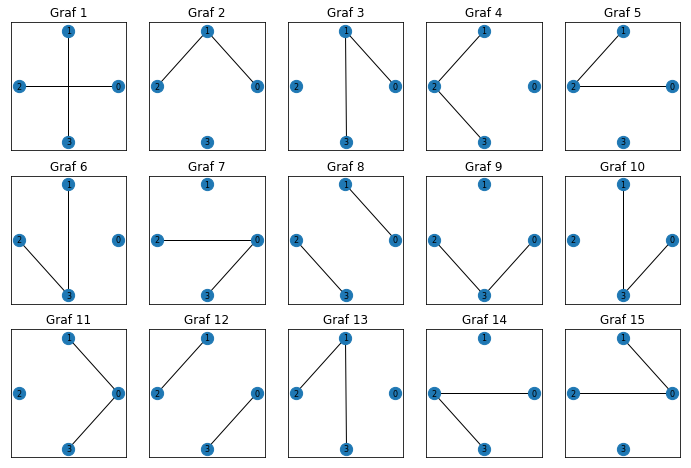

In [11]:
# Visualitzem els 15 grafs amb 4 nodes i 2 arestes que hi ha
plt.figure(num=None, figsize=(12, 8))
for i, v in enumerate(generated_graphs.values()):
    ax = plt.subplot(3, 5, i+1)
    pos = nx.kamada_kawai_layout(g)
    nx.draw_networkx(v[1], node_size=150, font_size=8, pos=pos)
    ax.set_title("Graf {}".format(i+1))

Comprovem que el resultat empíric coincideix amb el valor teòric:

In [15]:
# Creem una funció que calculi el nombre de grafs existents de n nodes i m arestes
# usant la fórmula amb els coeficients binomials
def num_existing_graphs(n, m):
    return binomial_coefficient(binomial_coefficient(n, 2), m)

# Utilitzem la funció anterior per a calcular el nombre de grafs de 4 nodes i 2 arestes
num_graphs = num_existing_graphs(n, m)

print("El nombre de grafs diferents que hi ha de {} nodes i {} arestes és: {}"
      .format(n, m, num_graphs))

El nombre de grafs diferents que hi ha de 4 nodes i 2 arestes és: 15


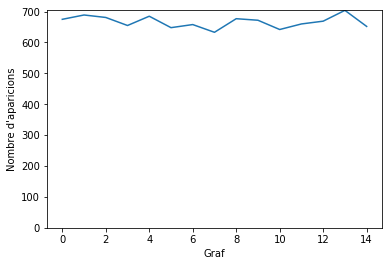

In [16]:
# Mostrem gràficament quantes vegades s'ha generat cadascun dels 15 grafs
num_times = [e[0] for e in generated_graphs.values()]
plt.plot(range(len(num_times)), num_times)
plt.ylim(0, max(num_times))
plt.xlabel("Graf")
plt.ylabel("Nombre d'aparicions")
plt.show()

Efectivament, la funció sembla que té un comportament uniforme, ja que cada un dels grafs possibles es genera un nombre de vegades similar.

#### 1.1.2 Eficiència de les funcions de generació

Finalment, revisarem les diferències entre les dues funcions de networkx que implementen el model del graf aleatori uniforme, [`gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) y [`dense_gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.dense_gnm_random_graph.html#networkx.generators.random_graphs.dense_gnm_random_graph). La diferència entre ambdues funcions rau en la seva implementació, optimitzada per a tractar amb grafs dispersos i densos, respectivament. Un graf dispers és aquell que té poques arestes mentre que, al contrari, un graf dens té moltes arestes (normalment un nombre d'arestes proper al màxim possible).

In [17]:
def compare_executions_gnm(n, m):
    """
    Crea grafs de n nodes i m arestes amb les funcions gnm_random_graph i  
    dense_gnm_random_graph i mostra el temps d'execució.
    """
    print("Utilitzant gnm_random_graph:")
    %timeit -n100 nx.gnm_random_graph(n, m)
    print("\nUtilitzant dense_gnm_random_graph:")
    %timeit -n100 nx.dense_gnm_random_graph(n, m)

In [18]:
# Comparem l'execució d'ambdues funcions creant grafs dispersos
# de 100 nodes i només 10 arestes
compare_executions_gnm(100, 10)

Utilitzant gnm_random_graph:
112 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Utilitzant dense_gnm_random_graph:
5.23 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
# Calculem el nombre màxim d'arestes d'un graf de 100 nodes
m = binomial_coefficient(100, 2)
print("El nombre de possibles arestes d'un graf de 100 nodes és: {}".format(m))

El nombre de possibles arestes d'un graf de 100 nodes és: 4950


In [20]:
# Comparem l'execució d'ambdues funcions creant grafs densos
# de 100 nodes i 4.800 arestes
compare_executions_gnm(100, 4800)

Utilitzant gnm_random_graph:
39.1 ms ± 385 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Utilitzant dense_gnm_random_graph:
11.4 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Efectivament, per a crear un graf dispers (en l'exemple, 100 nodes i 10 arestes) la funció [`gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) és molt més ràpida, mentre que per a crear un graf dens (en l'exemple, 100 nodes i 4800 arestes) la funció [`dense_gnm_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.dense_gnm_random_graph.html#networkx.generators.random_graphs.dense_gnm_random_graph) és més ràpida.

### 1.2 El model de Gilbert

Networkx permet crear grafs amb el model de Gilbert mitjançant les funcions [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) y [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph), que reben com a paràmetres el nombre de nodes, $n$, i la probabilitat de crear una aresta entre qualsevol parell de nodes, $p$.

Vegem un exemple senzill de creació d'un graf amb una d'aquestes funcions:

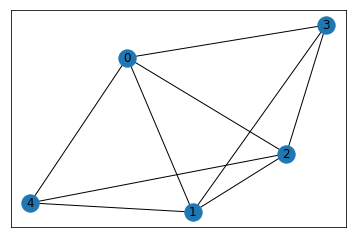

In [22]:
# Generem un graf aleatori amb 5 nodes, unint cada parell per una aresta
# amb probabilitat 0,6
g = nx.gnp_random_graph(n=5, p=0.6)

# Visualitzem el graf generat
nx.draw_networkx(g)

#### 1.2.1 Propietats bàsiques del model de Gilbert

A diferència del model del graf aleatori uniforme, els grafs generats amb el model de Gilbert no sempre tenen el mateix nombre d'arestes. Vegem la distribució del nombre d'arestes de grafs generats amb aquest model.

In [23]:
def generate_gnp_graphs(n, p, num_its=1000):
    """
    La funció genera num_its grafs aleatoris de n nodes amb probabilitat p de
    generar cada possible aresta usant la funció gnp_random_graph, i retorna
    dues llistes:
    - una llista amb el nombre d'arestes dels grafs generats 
    - una llista de llistes amb els graus dels nodes dels grafs generats
    """
    num_edges = []
    node_degrees = []
    for _ in range(num_its):
        # Generem un graf aleatori
        g = nx.gnp_random_graph(n=n, p=p)
        # Desem el nombre d'arestes del graf generat
        num_edges.append(g.number_of_edges())
        node_degrees.append([d for (node, d) in g.degree()])
    return num_edges, node_degrees

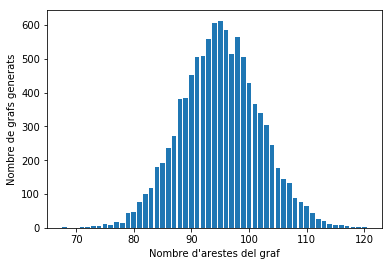

In [24]:
# Mostrem gràficament el nombre de vegades que s'han generat grafs amb un 
# nombre d'arestes determinat

from collections import Counter

# Generem 10.000 grafs de 20 nodes amb p = 0,5
num_edges, node_degrees = generate_gnp_graphs(n=20, p=0.5, num_its=10000)
# Comptem quantes vegades apareixen cada nombre d'arestes.
ctr_edges = Counter(num_edges)
x, y = zip(*[(k, v) for k, v in ctr_edges.items()])
# Generem un diagrama de barres
plt.bar(x, y)
plt.xlabel("Nombre d'arestes del graf")
plt.ylabel("Nombre de grafs generats")
plt.show()

El nombre esperat d'arestes d'un graf generat amb el model de Gilbert és:

$$p{n\choose 2}$$

Comprovem el resultat obtingut teòricament amb els grafs que genera la funció Networkx mitjançant la funció [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html):

In [25]:
# Definim una funció que calcula el nombre d'arestes esperat
# usant la fórmula amb els coeficients binomials
def expected_num_of_edges(n, p):
    return p*binomial_coefficient(n, 2)

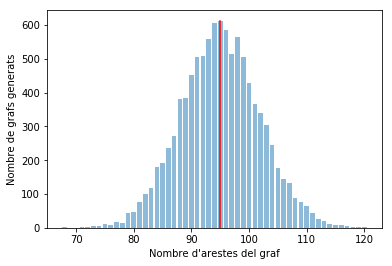

In [26]:
# Comparem el resultat teòric amb els grafs obtinguts amb la
# funció gnp_random_graph
m = expected_num_of_edges(n=20, p=0.5)

# Mostrem els valors observats amb barres blaves i el valor
# teòric en vermell
plt.bar(x, y, alpha=0.5)
plt.plot([m, m], [0, max(y)], 'r')
plt.xlabel("Nombre d'arestes del graf")
plt.ylabel("Nombre de grafs generats")
plt.show()

El grau esperat d'un node en un graf generat pel model de Gilbert és de:

$$p(n-1)$$

De nou, comparem-ho amb els valors obtinguts en els grafs generats amb networkx:

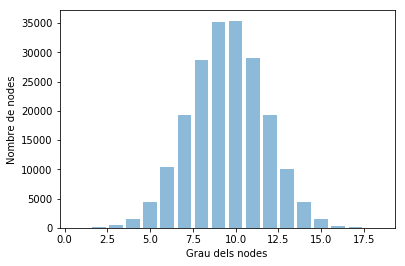

In [27]:
# Mostrem gràficament el nombre de nodes que s'han generat en
# tots els grafs amb cada valor de grau

all_degrees = [d for deg_dist in node_degrees for d in deg_dist]
ctr_degrees = Counter(all_degrees)
x, y = zip(*[(k, v) for k, v in ctr_degrees.items()])

plt.bar(x, y, alpha=0.5)
plt.xlabel("Grau dels nodes")
plt.ylabel("Nombre de nodes")
plt.show()

In [28]:
# Definim una funció que calcula el grau esperat d'un node
# d'un graf generat pel model de Gilbert
def expected_degree(n, p):
    return p*(n-1)

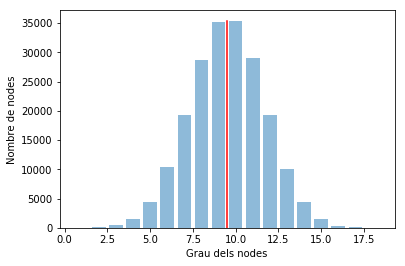

In [29]:
# Comparem el resultat teòric amb els grafs obtinguts amb la
# funció gnp_random_graph
d = expected_degree(n=20, p=0.5)

# Mostrem els valors observats amb barres blaves i el valor
# teòric en vermell
plt.bar(x, y, alpha=0.5)
plt.plot([d, d], [0, max(y)], 'r')
plt.xlabel("Grau dels nodes")
plt.ylabel("Nombre de nodes")
plt.show()

#### 1.2.2 Transicions de fase

Els grafs generats pel model de Gilbert tenen una transició de fase en la mida del component gegant (en $p = 1/n$) y en la conectividad (en $p = log(n)/n$). Observem com es manifesten aquestes transicions utilitzant grafs generats per la funció [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph).

En primer lloc, creem dues funcions que ens retornen el valor de p en el qual es produeix cadascuna de les transicions de fase segons el nombre de nodes del graf:

In [30]:
from math import log

def pt_giant_component(n):
    """
    Retorna el valor p on es produeix la transició de fase 
    en la mida del component gegant.
    """
    return 1/n

def pt_connectivity(n):
    """
    Retorna el valor p on es produeix la transició de fase 
    en la connectivitat del graf.
    """
    return log(n)/n

Creem també una funció que ens permeti visualitzar el component gegant d'un graf:

In [31]:
def draw_g_giant_component(g, node_size=50):
    """
    Visualitza un graf ressaltant els nodes i les arestes que pertanyen
    al component gegant del graf
    """
    
    # Mostrem el graf complet en gris utilitzant un layout circular
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, pos, node_color='#ACA7A7', node_size=node_size, alpha=1, with_labels=False)
    
    # Repintem els nodes i els que pertanyen al component gegant
    # en blau
    gcc = sorted(nx.connected_component_subgraphs(g), key = len, reverse=True)
    giant_component = gcc[0]

    nx.draw_networkx_nodes(giant_component, pos, node_color='#016db5', node_size=node_size, alpha=1)
    nx.draw_networkx_edges(giant_component, pos, edge_color='#0099ff', alpha=0.6, width=5.0)
    
    return len(giant_component)

Ara, utilitzarem les funcions anteriors per a visualitzar un graf de 20 nodes, per a valors de p immediatament inferiors i superiors al punt en el qual es produeix la transició de fase respecte al component gegant del graf:

La transició de fase de component gegant es troba en p = 0.05


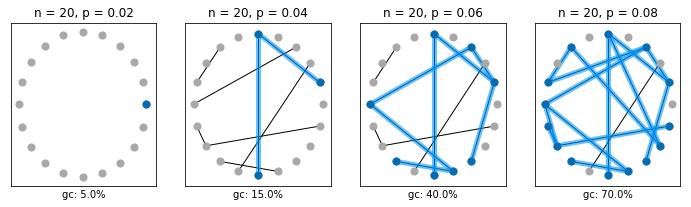

In [32]:
# Generem 4 grafs de 20 nodes amb el model de Gilbert, per a valors de 
# p propers al punt de transició de fase de component gegant i els visualitzem
# ressaltant el component gegant
n = 20
deltas = [-0.03, -0.01, 0.01, 0.03]
pt_giant = pt_giant_component(n)
print("La transició de fase de component gegant es troba en p = {}".format(pt_giant))

plt.figure(num=None, figsize=(12, 3))
for i, d in enumerate(deltas):
    ax = plt.subplot(1, 4, i+1)
    p = pt_giant + d
    g = nx.gnp_random_graph(n=n, p=p, seed=41)
    giant_component = draw_g_giant_component(g)
    ax.set_title("n = {}, p = {:.2f}".format(n, p))
    ax.set_xlabel('gc: {}%'.format(giant_component/g.number_of_nodes()*100))


Fixeu-vos que en els dos primers grafs, generats amb valors de $p$ inferiors a $0.05$, el component gegant és inexistent (el component més gran reuneix únicament tres nodes, i no és l'únic component que agrupa tres nodes). En canvi, en generar grafs amb $p$ per sobre de $0.05$, apareix un component gegant, que agrupa el $40\%$ dels nodes per al graf generat amb $p=0.06$ i el $70\%$ d’aquests per a $p=0.08$.

Observeu que en l'exemple, es fa ús del paràmetre  `seed`. En la secció  [5.1 - Reproducibilidad](#5.1-Reproducibilidad) explicarem amb més detall l'ús d'aquest paràmetre en les funcions de generació de grafs.

Repetirem ara el procés per a valors propers al punt de transició de fase respecte a la connectivitat del graf:

La transició de fase de connectivitat es troba en p = 0.02649158683274018


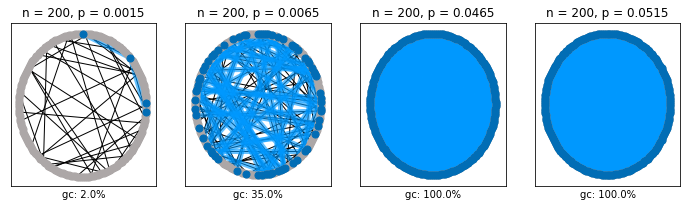

In [33]:
# Generem 4 grafs de 20 nodes amb el model de Gilbert, per a valors de 
# p propers al punt de transició de fase de connectivitat i els visualitzem
# ressaltant el component gegant.
n = 200
deltas = [-0.025, -0.02, 0.02, 0.025]
pt_conn = pt_connectivity(n)
print("La transició de fase de connectivitat es troba en p = {}".format(pt_conn))


plt.figure(num=None, figsize=(12, 3))
for i, d in enumerate(deltas):
    ax = plt.subplot(1, 4, i+1)
    p = pt_conn + d
    g = nx.gnp_random_graph(n=n, p=p, seed=42)
    giant_component = draw_g_giant_component(g)
    ax.set_title("n = {}, p = {:.4f}".format(n, p))
    ax.set_xlabel('gc: {}%'.format(giant_component/g.number_of_nodes()*100))



En aquest cas, per a valors de $p$ inferiors a $0.026$, el graf és disconnex (per a $p=0.0065$, només el $35%$ dels nodes estan en el component gegant, i la resta de nodes del graf es troben en altres components). En canvi, en generar grafs amb $p$ per sobre de $0.026$, el graf passa a ser connex, de manera que hi ha un camí entre qualsevol parell de nodes del graf (el component gegant comprèn tots els nodes del graf).

#### 1.2.3 Eficiència de les funcions de generació

De la mateixa manera que amb les variants gnm, networkx disposa de dues funcions que implementen el model de Gilbert, [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) i [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph), que difereixen en la implementació del model. La funció [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph) està optimitzada per a tractar amb grafs dispersos, per la qual cosa és més ràpida que [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) per a aquest tipus de grafs:

In [34]:
def compare_executions_gnp(n, p):
    """
    Crea grafs de n nodes unint cada parell amb probabilitat p amb les 
    funcions gnp_random_graph i fast_gnp_random_graph i mostra el temps d'execució.
    """
    print("Utilitzan gnp_random_graph:")
    %timeit -n100 nx.gnp_random_graph(n, p)
    print("\nUtilitzant fast_gnp_random_graph:")
    %timeit -n100 nx.fast_gnp_random_graph(n, p)

In [35]:
# Comparem l'execució d'ambdues funcions creant grafs dispersos
# de 100 nodes amb p = 0,01.
compare_executions_gnp(100, 0.01)

Utilitzan gnp_random_graph:
835 µs ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Utilitzant fast_gnp_random_graph:
153 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
# Comparem l'execució d'ambdues funcions creant grafs densos
# de 100 nodes amb p = 0,9.
compare_executions_gnp(100, 0.9)

Utilitzan gnp_random_graph:
5.56 ms ± 432 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Utilitzant fast_gnp_random_graph:
7.32 ms ± 619 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


La funció [`fast_gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph) és més ràpida a l’hora de crear grafs poc dispersos (en l'exemple, grafs amb $p = 0.01$) mentre que [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) és més ràpida quan els grafs que s’han de generar són densos (en l'exemple, $p = 0.9$).

Com a últim apunt, observeu que networkx disposa de dos àlies addicionals per a la funció [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html): [`binomial_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.binomial_graph.html#networkx.generators.random_graphs.binomial_graph) y [`erdos_renyi_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph).

## 2. Models amb distribució de graus específica

La llibreria networkx incorpora també les dues variants de models amb distribució de graus específica que es descriuen en el llibre *Anàlisis de datos de redes sociales*: el model de configuració i el model de graf aleatori amb distribució de graus esperada.

### 2.1 El model de configuració

Networkx disposa de la funció  [`configuration_model`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html), que permet crear grafs aleatoris amb una seqüència de graus determinada utilitzant el model de configuració. Vegem-ne un exemple senzill d’ús:

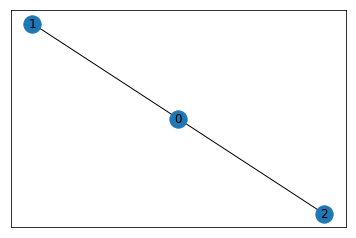

In [38]:
# Creem un graf de tres nodes amb seqüència de graus 2, 1, 1
g = nx.configuration_model([2, 1, 1])

# Mostrem el graf creat
nx.draw_networkx(g)

Podem comprovar que els grafs generats amb aquest model tenen exactament la seqüència de graus especificada:

In [39]:
# Seleccionem una seqüència de graus
target_deg_distr = [4, 3, 3, 3, 2, 2, 1]

# Creem un graf amb aquesta seqüència utilitzant el model de configuració
g = nx.configuration_model(target_deg_distr)

# Calculem la distribució de graus del graf generat
deg_distr = [n[1] for n in g.degree()]

# Comparem ambdues seqüències
print("Seqüència original: {}".format(target_deg_distr))
print("Seqüència obtinguda: {}".format(deg_distr))
print("Són iguals les seqüències?: {}".format(deg_distr == target_deg_distr))

Seqüència original: [4, 3, 3, 3, 2, 2, 1]
Seqüència obtinguda: [4, 3, 3, 3, 2, 2, 1]
Són iguals les seqüències?: True


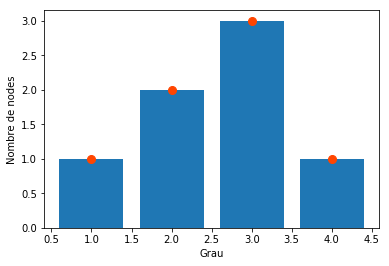

In [40]:
# Generem una visualització gràfica d'ambdues distribucions

# Comptem quantes vegades apareix cada grau en ambdues distribucions
ctr_target_deg = Counter(target_deg_distr)
x1, y1 = zip(*[(k, v) for k, v in ctr_target_deg.items()])

ctr_deg = Counter(deg_distr)
x2, y2 = zip(*[(k, v) for k, v in ctr_deg.items()])

# Generem un diagrama de barres amb els valors observats afegint punts en els 
# valors originals.
plt.bar(x2, y2)
plt.plot(x1, y1, 'o', color='orangered', markersize=8)
plt.xlabel("Grau")
plt.ylabel("Nombre de nodes")
plt.show()

Com podem comprovar tant analíticament com gràficament, la seqüència de graus especificada i la seqüència de graus que té el graf generat coincideixen.

Amb el model de configuració la probabilitat de generar cada possible graf amb una seqüència de graus concreta no és sempre la mateixa, ja que aquesta depèn del nombre d'aparellaments diferents que portin a la mateixa xarxa. Vegem-ho amb l'exemple de generació de grafs amb seqüència [2, 1, 1]

In [41]:
def generate_conf_graphs(deg_seq, num_its=1000):
    """
    La funció genera num_its grafs aleatoris amb la seqüència de graus
    deg_seq utilitzant la funció configuration_model, i retorna un diccionari
    amb els diferents grafs generats i el nombre de vegades que s'ha 
    generat cada graf.
    """
    generated_graphs = {}
    for _ in range(num_its):
        # Generem un graf aleatori amb el model de configuració
        g = nx.configuration_model(deg_seq)
        # Generem una representació en forma de cadena de caràcters del graf generat
        # per a poder-la usar com a clau del diccionari
        g_str = str(nx.adjacency_matrix(g))
        # Actualitzem el comptador de grafs
        if g_str in generated_graphs:
            generated_graphs[g_str][0] += 1
        else:
            # A més del nombre de vegades que es genera cada graf, desem una còpia del graf
            # per a poder-lo visualitzar
            generated_graphs[g_str] = [1, g]
    return generated_graphs

In [44]:
# Generem grafs aleatoris amb distribució de graus [2, 1, 1]
deg_distr = [2, 1, 1]
generated_graphs = generate_conf_graphs(deg_distr)

print("El nombre de grafs diferents generats amb seqüència de graus {} es: {}"
      .format(deg_distr, len(generated_graphs.keys())))

El nombre de grafs diferents generats amb seqüència de graus [2, 1, 1] es: 2


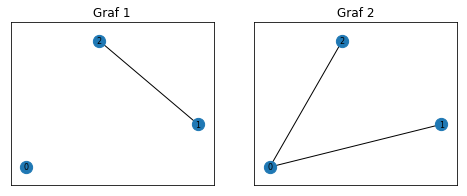

In [45]:
# Visualitzem els 2 grafs diferents que hi ha amb seqüència [2, 1, 1]
plt.figure(num=None, figsize=(8, 3))
for i, v in enumerate(generated_graphs.values()):
    ax = plt.subplot(1, 2, i+1)
    pos = nx.kamada_kawai_layout(g)
    nx.draw_networkx(v[1], node_size=150, font_size=8, pos=pos)
    ax.set_title("Graf {}".format(i+1))

Hi ha dos detalls importants que cal tenir en compte a l'hora d'interpretar el resultat del codi anterior. 

D'una banda, en especificar la seqüència [2, 1, 1] indiquem implícitament que el node 0 tindrà grau 2, el node 1 tindrà grau 1, i el node 2 tindrà grau 1. Així, doncs, altres grafs que també tinguin un node amb grau 2 i dos nodes amb grau 1, però amb assignacions diferents, quedaran sempre descartats i no es generaran. Per exemple, el graf següent no es generaria mai:

La secuencia de grados es: [1, 2, 1]


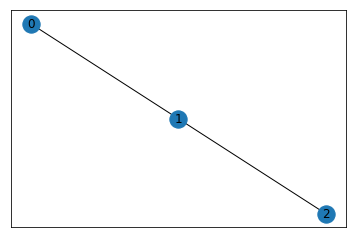

In [46]:
# Generem un graf amb un node de grau 2 i dos nodes de grau 1 que no es generarà mai
# en especificar la seqüència [2, 1, 1]
g_diff = nx.Graph()
g_diff.add_edges_from([(0, 1), (1, 2)])

# Mostrem el graf
nx.draw_networkx(g_diff)

# Mostrem la distribució de graus del graf
deg_distr = [n[1] for n in g_diff.degree()]
print("La secuencia de grados es: {}".format(deg_distr))

D'altra banda, el node 0 sempre té grau 2, encara que no s'apreciï correctament en una de les dues visualitzacions generades. Això és així ja que networkx no és capaç de mostrar els bucles (les arestes que tenen com a origen i destinació el mateix node), per la qual cosa a primera vista pot semblar que el graf generat és incorrecte.

La seqüència de graus és: [2, 1, 1]
Els nodes amb bucles són: [0]


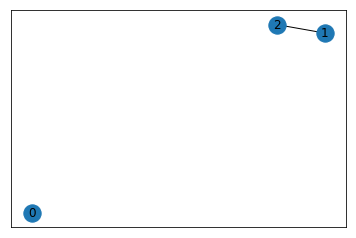

In [48]:
# Generem un graf amb un bucle en el node 0 i comprovem com es visualitza
g_selfloop = nx.Graph()
g_selfloop.add_edges_from([(0, 0), (1, 2)])

# Mostrem el graf
nx.draw_networkx(g_selfloop)

# Mostrem la seqüència de graus del graf
deg_distr = [n[1] for n in g_selfloop.degree()]
print("La seqüència de graus és: {}".format(deg_distr))

# Mostrem els nodes amb bucles
print("Els nodes amb bucles són: {}".format([a for a in g_selfloop.nodes_with_selfloops()]))

Finalment, comprovem que el nombre de vegades que s'ha generat cadascun dels dos grafs no és el mateix (hi ha dos aparellaments que porten al graf amb arestes [(0, 1), (0, 2)] i només un aparellament que porta al graf amb arestes [(0, 0), (1, 2)]:
 

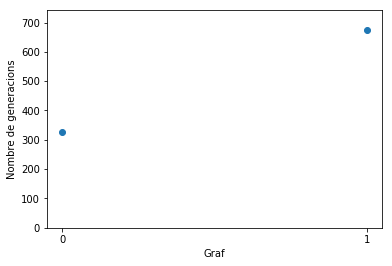

In [49]:
# Mostrem gràficament quantes vegades s'ha generat cadascun dels 2 grafs
num_times = [e[0] for e in generated_graphs.values()]
plt.plot(range(len(num_times)), num_times, 'o')
plt.ylim(0, max(num_times)*1.1)
plt.xticks([0, 1])
plt.xlabel("Graf")
plt.ylabel("Nombre de generacions")
plt.show()

### 2.2 Model de graf aleatori amb distribució de graus esperada

Networkx implementa el model de graf aleatori amb distribució de graus esperada a través de la funció  [`expected_degree_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.expected_degree_graph.html#networkx.generators.degree_seq.expected_degree_graph) que, de la mateixa manera que la funció que implementa el model de configuració, rep com a paràmetre obligatori una llista de graus. Vegem un exemple senzill de creació d'un graf amb aquest model:

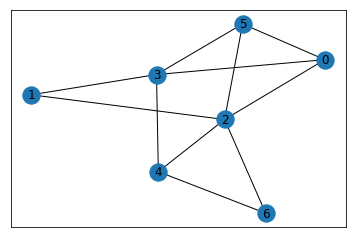

In [51]:
# Seleccionem una seqüència de graus i generem un graf amb el model
# de graf aleatori amb distribució de graus esperada
target_deg_distr = [4, 3, 3, 3, 2, 2, 1]
g = nx.expected_degree_graph(target_deg_distr)

# Mostrem el graf generat
nx.draw_networkx(g)

A diferència del model de configuració, el model de graf aleatori amb distribució de graus esperada pot generar grafs amb seqüències de graus diferents a l'especificada.

In [52]:
# Seleccionem una seqüència de graus
target_deg_distr = [4, 3, 3, 3, 2, 2, 1]

# Creem un graf amb aquesta seqüència usant el model de graf 
# aleatori amb distribució de graus esperada
g = nx.expected_degree_graph(target_deg_distr)

# Calculem la distribució de graus del graf generat
deg_distr = [n[1] for n in g.degree()]

# # Comparem ambdues distribucions
print("Seqüència original: {}".format(target_deg_distr))
print("Seqüència obtinguda: {}".format(deg_distr))
print("Són iguals les seqüències?: {}".format(deg_distr == target_deg_distr))

Seqüència original: [4, 3, 3, 3, 2, 2, 1]
Seqüència obtinguda: [5, 5, 0, 2, 1, 2, 1]
Són iguals les seqüències?: False


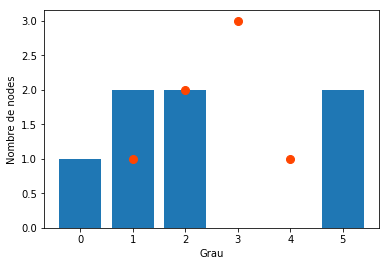

In [53]:
# Generem una visualització gràfica d'ambdues distribucions

# Comptem quantes vegades apareix cada grau en ambdues distribucions
ctr_target_deg = Counter(target_deg_distr)
x1, y1 = zip(*[(k, v) for k, v in ctr_target_deg.items()])

ctr_deg = Counter(deg_distr)
x2, y2 = zip(*[(k, v) for k, v in ctr_deg.items()])

# Generem un diagrama de barres amb els valors observats afegint punts en els 
# valors especificats originalment
plt.bar(x2, y2)
plt.plot(x1, y1, 'o', color='orangered', markersize=8)
plt.xlabel("Grau")
plt.ylabel("Nombre de nodes")
plt.show()

Com podem apreciar, hi ha diferències entre la seqüència de graus proporcionada originalment (punts de color taronja en el gràfic) i la seqüència de graus observada en el graf generat (barres de color blau). Aquestes diferències, que poden semblar importants, tendeixen a desaparèixer en generar grafs grans:

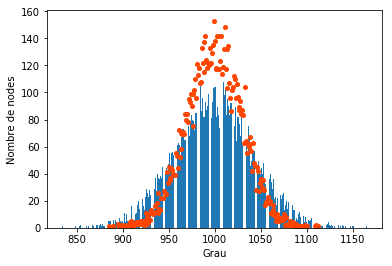

In [54]:
# Generem una seqüència de graus vàlida a partir de generar un graf gnp
g = nx.gnp_random_graph(10000, 0.1)
target_deg_distr = [n[1] for n in g.degree()]

# Creem un graf amb aquesta seqüència utilitzant el model de graf 
# aleatori amb distribució de graus esperada
g = nx.expected_degree_graph(target_deg_distr)

# Calculem la distribució de graus del graf generat
deg_distr = [n[1] for n in g.degree()]

# Generem una visualització gràfica d'ambdues distribucions

# Comptem quantes vegades apareix cada grau en ambdues distribucions
ctr_target_deg = Counter(target_deg_distr)
x1, y1 = zip(*[(k, v) for k, v in ctr_target_deg.items()])

ctr_deg = Counter(deg_distr)
x2, y2 = zip(*[(k, v) for k, v in ctr_deg.items()])

# Generem un diagrama de barres amb els valors observats afegint punts en els 
# valors especificats originalment
plt.bar(x2, y2)
plt.plot(x1, y1, 'o', color='orangered', markersize=4)
plt.xlabel("Grau")
plt.ylabel("Nombre de nodes")
plt.show()

En el model de graf aleatori amb distribució de graus esperada, a partir de dos nodes $v_i$ i $v_j$, la probabilitat que hi hagi una aresta entre ells està determinada per l’expressió següent:

$$p_{ij} = \frac{d_i d_j}{\sum_{l=1}^{n}{d_l}}$$

Comprovem-ho generant grafs amb aquest model i observant quantes vegades es crea cadascuna de les possibles arestes del graf. Compararem el resultat obtingut amb la probabilitat teòrica:

In [55]:
def expected_degree_model_probs(deg_seq):
    """
    Atesa una seqüència de graus, crea una matriu amb les probabilitats p_ij
    que hi hagi una aresta per a cada parell de nodes (v_, v_j) del graf.
    """
    # Creem una matriu de zeros quadrada, amb tantes files i columnes com nodes
    num_nodes = len(deg_seq)
    acc_adj_matrix = np.zeros((num_nodes, num_nodes))    
    
    # Assignem el valor di * dj a cada posició de la matriu
    for i, di in enumerate(deg_seq):
        for j, dj in enumerate(deg_seq):
            acc_adj_matrix[i][j] = di * dj
    s = sum(deg_seq)
    
    return acc_adj_matrix / s

def generate_expected_deg_graphs(orig_deg_dist, num_its=1000):
    """
    La funció genera num_its grafs aleatoris amb distribució esperada orig_deg_dist
    usant la funció expected_degree_graph, i retorna la matriu d’adjacència mitjana
    generada (la suma de matrius d’adjacència dividida pel nombre d'iteracions realitzades).
    """
    # Creem una matriu de zeros quadrada, amb tantes files i columnes com nodes
    num_nodes = len(orig_deg_dist)
    acc_adj_matrix = np.zeros((num_nodes, num_nodes))
    
    # Acumulem la matriu d’adjacència dels grafs generats
    for _ in range(num_its):
        g = nx.expected_degree_graph(orig_deg_dist)
        acc_adj_matrix += nx.adjacency_matrix(g)
        
    return acc_adj_matrix / num_its

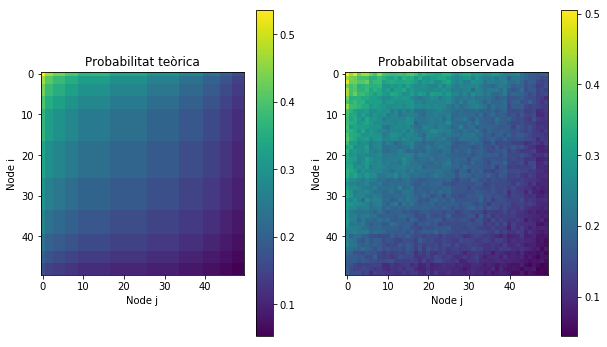

In [56]:
# Generem una seqüència de graus vàlida a partir de generar un graf gnp
g = nx.gnp_random_graph(50, 0.2)
target_deg_distr = sorted([n[1] for n in g.degree()], reverse=True)

# Calculem les probabilitats teòriques i observades que hi hagi una aresta entre
# cada parell de nodes del graf.
prob = expected_degree_model_probs(target_deg_distr)
obs_probs = generate_expected_deg_graphs(target_deg_distr)

# Mostrem gràficament el resultat amb un heatmap
plt.figure(num=None, figsize=(10, 6))

ax = plt.subplot(1, 2, 1)
ax.set_title("Probabilitat teòrica")
im = ax.imshow(prob)
plt.xlabel('Node j')
plt.ylabel('Node i')
plt.colorbar(im)

ax = plt.subplot(1, 2, 2)
ax.set_title("Probabilitat observada")
im = ax.imshow(obs_probs)
plt.xlabel('Node j')
plt.ylabel('Node i')
plt.colorbar(im)

plt.show()

Les imatges anteriors mostren la probabilitat que hi hagi una aresta entre cada parell de nodes, calculada teòricament (esquerra) o experimentalment amb els grafs generats per la funció [`expected_degree_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.expected_degree_graph.html#networkx.generators.degree_seq.expected_degree_graph) (dreta). Cada píxel de la imatge mostra la probabilitat que hi hagi una aresta entre el node indicat en l'eix d'abscisses i l'indicat en l'eix d'ordenades. Les imatges són simètriques respecte a la diagonal, ja que els grafs no són dirigits. 

Així, doncs, com era d'esperar, la probabilitat observada que hi hagi una aresta entre cada parell de nodes del graf s'aproxima al valor teòric del model.

### 2.3 Existència del graf amb una seqüència de graus determinada

Com hem vist, no totes les seqüències de graus són vàlides, i hi ha algunes seqüències per a les quals no és possible crear un graf que les generi. La funció [`configuration_model`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html) llançarà una excepció si rep com a paràmetre una seqüència per a la qual no pot generar un graf. En canvi, [`expected_degree_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.expected_degree_graph.html#networkx.generators.degree_seq.expected_degree_graph) no produirà cap excepció, ja que pot generar grafs amb seqüències semblants a la proporcionada:

In [57]:
# Intentem generar un graf amb seqüència de graus [1].
g = nx.expected_degree_graph([1])
deg_distr = [n[1] for n in g.degree()]
print("La funció expected_degree_graph ha generat un graf amb seqüència de graus: {}".format(deg_distr))

print("\nLa funció configuration_model genera una excepció en intentar generar el graf")
try:
    g = nx.configuration_model([1])
except nx.NetworkXError:
    print("S'ha generat una excepció en intentar crear el graf")


La funció expected_degree_graph ha generat un graf amb seqüència de graus: [2]

La funció configuration_model genera una excepció en intentar generar el graf
S'ha generat una excepció en intentar crear el graf


Per a saber si una seqüència de graus és gràfica (és a dir, si és la seqüència de graus d'algun graf simple), networkx incorpora la funció [`is_valid_degree_sequence_erdos_gallai`](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.graphical.is_valid_degree_sequence_erdos_gallai.html):

In [58]:
# Comprovem si la seqüència de graus [1] és gràfica
deg_sq = [1]
is_graphical = nx.is_valid_degree_sequence_erdos_gallai(deg_sq)
print("La seqüència de graus {} és gràfica?: {}".format(deg_sq, is_graphical))

La seqüència de graus [1] és gràfica?: False


In [59]:
# Comprovem si la seqüència de graus [4, 4, 3, 3, 2] és gràfica
deg_sq = [4, 4, 3, 3, 2]
is_graphical = nx.is_valid_degree_sequence_erdos_gallai(deg_sq)
print("La seqüència de graus {} és gràfica?: {}".format(deg_sq, is_graphical))

La seqüència de graus [4, 4, 3, 3, 2] és gràfica?: True


Com a última apunt, és interessant observar que la funció [`configuration_model`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html) serà capaç de generar grafs per a algunes seqüències no gràfiques, ja que el model admet la creació de bucles:

In [60]:
# Comprovem que la seqüència [6, 5, 5, 4, 2, 2, 2] no és gràfica
deg_sq = [6, 5, 5, 4, 2, 2, 2]
is_graphical = nx.is_valid_degree_sequence_erdos_gallai(deg_sq)
print("La seqüència de graus {} és gràfica?: {}".format(deg_sq, is_graphical))

# Generem un graf amb el model de configuració utilitzant la 
# seqüència de graus anterior.
g = nx.configuration_model(deg_sq)
deg_distr = [n[1] for n in g.degree()]

# Mostrem els nodes amb bucles
print("Els nodes amb bucles són: {}".format([a for a in g.nodes_with_selfloops()]))

La seqüència de graus [6, 5, 5, 4, 2, 2, 2] és gràfica?: False
Els nodes amb bucles són: [0, 1]


## 3. Models de xarxes small world: el model Watts-Strogatz

La funció [`watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html) de networkx permet crear grafs *small world* seguint el model de Watts-Strogatz. La funció rep tres paràmetres obligatoris, el nombre de nodes $n$, el nombre de veïns al qual es connectarà inicialment cada node $k$, i la probabilitat de recablejar cada connexió $p$.

Vegem un exemple de creació d'un graf amb aquest model:

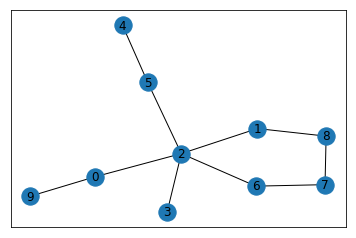

In [61]:
# Creem un graf de 10 nodes
g = nx.watts_strogatz_graph(n=10, k=3, p=0.5)

# Visualitzem el graf creat
nx.draw_networkx(g)

Quan la probabilitat de recablejar les arestes és 0, els grafs generats per aquest model corresponen a grafs regulars. Visualitzem alguns exemples per a diferents valors de $k$:

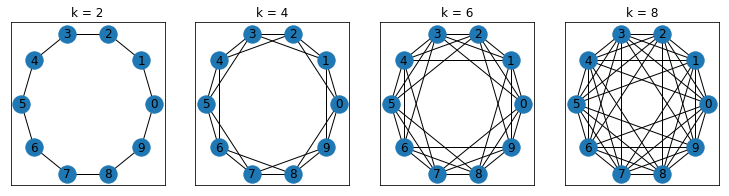

In [62]:
# Generem 4 grafs amb 10 nodes, variant el nombre de veïns al qual es connecta cada 
# node inicialment, i amb una probabilitat de recablejat de 0
n, p = 10, 0
plt.figure(num=None, figsize=(16, 3))
for i, k in enumerate(range(2, 10, 2)):
    ax = plt.subplot(1, 5, i+1)
    # Generem el graf amb el model Watts-Strogatz
    g = nx.watts_strogatz_graph(n=n, k=k, p=p)
    # Mostrem el graf utilitzant un layout circular
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, pos=pos)
    ax.set_title("k = {}".format(k))

Observeu que els grafs generats no únicament són $k$-regulars, sinó que els $k$ veïns als quals està connectat cada node corresponen als $k/2$ immediatament següents i als $k/2$ immediatament anteriors (considerant una ordenació circular, en la qual després de l'últim node torna a aparèixer el primer, i utilitzant l'identificador del node per a establir l'ordre).  

Hem vist com afecta variar el valor $k$ sobre el graf generat. Ara veurem quin efecte té variar la probabilitat de recablejat $p$ sobre els grafs generats per aquest model:

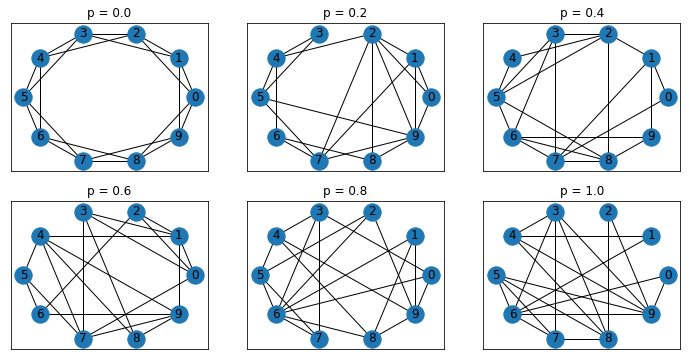

In [63]:
# # Generem 6 grafs amb 10 nodes, amb k = 4, variant la probabilitat de recablejat
n, k = 10, 4
plt.figure(num=None, figsize=(12, 6))
num_of_edges = []
for i, p in enumerate(np.arange(0, 1.1, 0.2)):
    ax = plt.subplot(2, 3, i+1)
    # Generem el graf amb el model Watts-Strogatz.
    g = nx.watts_strogatz_graph(n=n, k=k, p=p)
    # Mostrem el graf utilitzant un layout circular
    pos = nx.circular_layout(g)
    nx.draw_networkx(g, pos=pos)
    ax.set_title("p = {:.2}".format(p))
    # Desem el nombre d'arestes del graf generat
    num_of_edges.append(g.number_of_edges())

Podem veure que l'estructura d'anell inicial, en què cada node està connectat als seus $k/2$ veïns immediatament següents i els seus $k/2$ veïns immediatament anteriors es va perdent a mesura que augmentem el valor de la probabilitat de recablejat $p$.

Ara bé, variar la probabilitat de recablejat no afecta el nombre total d'arestes del graf, ja que quan es recableja una aresta, aquesta es 'desconnecta' d'un dels nodes i es 'connecta' a un nou node. És a dir, en recablejar una aresta $(v_i, v_j)$, aquesta desapareix i es crea una nova aresta $(v_i, v_k$), per la qual cosa la mida del graf no es veu afectada pel recablejat:

In [65]:
for e, p in zip(num_of_edges, np.arange(0, 1.1, 0.2)):
    print("El nombre d'arestes del graf amb p = {:.2} es: {}".format(p, e))
    

El nombre d'arestes del graf amb p = 0.0 es: 20
El nombre d'arestes del graf amb p = 0.2 es: 20
El nombre d'arestes del graf amb p = 0.4 es: 20
El nombre d'arestes del graf amb p = 0.6 es: 20
El nombre d'arestes del graf amb p = 0.8 es: 20
El nombre d'arestes del graf amb p = 1.0 es: 20


Modificar els valors del nombre de veïns i la probabilitat de recablejat afecta les propietats del graf que es genera. Vegem l'impacte que tenen sobre el coeficient d'agrupament i la longitud dels camins més curts dels grafs generats:

In [73]:
from statistics import mean

def compute_mean_cc_sp_ws(n, k, p, num_its):
    """
    Crea num_its grafs amb el model Watts-Strogatz amb els paràmetres
    n, k i p especificats, i retorna la mitjana dels valors de coeficient
    d'agrupació i mitjana dels camins més curts de tots els grafs generats.
    """
    current_cc, current_sp = [], []
    for _ in range(num_its):
        g = nx.watts_strogatz_graph(n, k, p, seed=None)
        current_cc.append(nx.average_clustering(g))
        # en el cas de grafs disconnexes, cal calcular el SP per a cada component i calcular el valor mig
        tmp_cc = []
        for C in nx.connected_component_subgraphs(g):
            tmp_cc.append(nx.average_shortest_path_length(C))
        current_sp.append(mean(tmp_cc))
    return np.mean(current_cc), np.mean(current_sp)

In [74]:
# Calcula la mitjana del coeficient d'agrupació i dels camins més curts
# de grafs generats amb Watts-Strogatz, amb n = 100, k = 10
# i p variant de 0,0001 a 1.
n, k, num_its = 100, 10, 30
ps = np.exp(np.linspace(np.log(0.0001), np.log(1), 20))
cc_sp = [compute_mean_cc_sp_ws(n, k, p, num_its) for p in ps]
cc, sp = zip(*cc_sp)

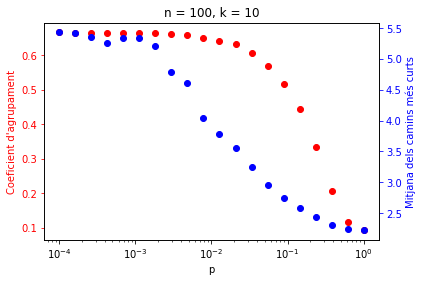

In [75]:
# Mostra l'evolució del coeficient d'agrupament i la mitjana dels camins més
# curts en variar la probabilitat de recablejat p
fig, ax1 = plt.subplots()

ax1.set_xlabel('p')
ax1.set_xscale('log')

# Mostrem el coeficient d'agrupament en vermell
ax1.plot(ps, cc, 'ro')
ax1.set_ylabel("Coeficient d'agrupament", color='r')
ax1.tick_params('y', colors='r')

# Mostrem la mitjana dels camins més curts en blau, generant un segon
# eix per a poder veure les dues escales
ax2 = ax1.twinx()
ax2.plot(ps, sp, 'bo')
ax2.set_ylabel('Mitjana dels camins més curts', color='b')
ax2.tick_params('y', colors='b')

# Afegim el títol de la gràfica i la mostrem
plt.title("n = {}, k = {}".format(n, k))
plt.show()

Com podem observar en la gràfica anterior, fixant el nombre de nodes i el nombre inicial de veïns, en augmentar la probabilitat de recablejat, la xarxa passa a tenir un coeficient d'agrupament menor (la probabilitat que els veïns d'un node estiguin connectats entre ells decreix) i la mitjana dels camins més curts entre nodes també decreix (de mitjana, la longitud del camí més curt entre dos nodes qualssevol és menor, ja que es creen connexions més enllà dels veïns més propers).

Repetim ara el procés fixant la probabilitat de recablejant i variant el nombre inicial de veïns $k$:

In [76]:
# Calcula la mitjana del coeficient d'agrupació i dels camins més curts
# de grafs generats amb wats strogatz, amb n = 100, k = 10
# i p variant de 0,0001 a 1
ks = range(2, 30, 2)
cc_sp = [compute_mean_cc_sp_ws(n, k, p, num_its) for k in ks]
cc, sp = zip(*cc_sp)

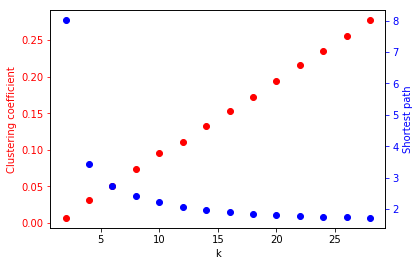

In [77]:
# Mostra l'evolució del coeficient d'agrupament i la mitjana dels camins més
# curts
fig, ax1 = plt.subplots()
ax1.set_xlabel('k')

# Mostrem el coeficient d'agrupament en vermell
ax1.plot(ks, cc, 'ro')
ax1.set_ylabel('Clustering coefficient', color='r')
ax1.tick_params('y', colors='r')

# Mostrem la mitjana dels camins més curts en blau, generant un segon
# eix per a poder veure les dues escales
ax2 = ax1.twinx()
ax2.plot(ks, sp, 'bo')
ax2.set_ylabel('Shortest path', color='b')
ax2.tick_params('y', colors='b')

# Afegim el títol de la gràfica i la mostrem
plt.show()

En canvi, fixant el nombre de nodes i la probabilitat de recablejat, en augmentar el nombre inicial de veïns als quals es connecta cada node, la xarxa passa a tenir un coeficient d'agrupament més gran. La mitjana dels camins més curts entre nodes decreix, ja que en crear més arestes es creen també nous camins que permeten disminuir la distància entre nodes.

### 3.1 Variants del model de Watts-Strogatz

La implementació del model Watts-Strogatz de la funció [`watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html) pot donar com a resultat la generació de grafs no connexos (és a dir, grafs amb més d'un component connex). Això és així ja que l'algorisme recableja les arestes segons la probabilitat especificada, però no té en compte les conseqüències del recablejat en el graf final:

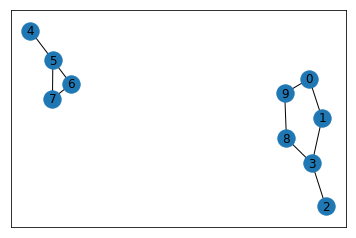

In [78]:
# Generem i mostrem un graf no connex amb el model Watts-Strogatz
g = nx.watts_strogatz_graph(n=10, k=2, p=0.1, seed=114)
nx.draw_networkx(g)

Si volem assegurar-nos que el graf generat amb Watts-Strogatz és un graf connex, podem usar la funció [`connected_watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.connected_watts_strogatz_graph.html#networkx.generators.random_graphs.connected_watts_strogatz_graph), que retorna sempre un graf dirigit (o bé un error si no s'ha pogut generar el graf després d'un nombre prefixat d'intents). Els paràmetres que rep aquesta funció són anàlegs als de la funció [`watts_strogatz_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html), encara que també rep el paràmetre addicional `tries` que fixa el nombre d'intents que es poden utilitzar en la generació del graf:

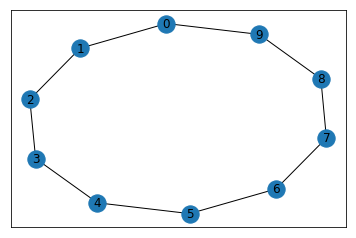

In [79]:
# Generem i mostrem un graf amb la funció connected_watts_strogatz_graph
g = nx.connected_watts_strogatz_graph(n=10, k=2, p=0.1, seed=114)
nx.draw_networkx(g)

In [80]:
# Generem 2.000 grafs aleatoris i comprovem quants són connexos
# utilitzant les funcions watts_strogatz_graph i connected_watts_strogatz_graph.

n, k, p = 10, 2, 0.1
num_its = 2000

cws = [nx.is_connected(nx.connected_watts_strogatz_graph(n=n, k=k, p=p)) for _ in range(num_its)]
ws = [nx.is_connected(nx.watts_strogatz_graph(n=n, k=k, p=p)) for _ in range(num_its)]
     
print("Percentatge de grafs connexos generats:")
print("\tUtilitzant connected_watts_strogatz_graph: {:.2f}%".format(sum(cws)/num_its*100))
print("\tUtilitzant watts_strogatz_graph: {:.2f}%".format(sum(ws)/num_its*100))

Percentatge de grafs connexos generats:
	Utilitzant connected_watts_strogatz_graph: 100.00%
	Utilitzant watts_strogatz_graph: 98.05%


## 4. Models de creixement: el model Barabási-Albert

Networkx disposa de la funció [`barabasi_albert_graph`](https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) que permet crear xarxes aleatòries seguint aquest model de connexió preferencial. La funció rep dos paràmetres: el nombre de nodes del graf que es vol generar i el nombre d'arestes que s'afegeixen cada vegada que un nou node es connecta a la xarxa. Vegem-ne un exemple senzill d’ús:

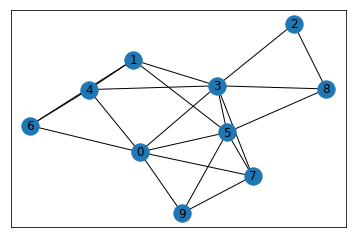

In [81]:
# Generem un graf aleatori amb 10 nodes
n, m = 10, 3
g = nx.barabasi_albert_graph(n=n, m=m)

# Visualitzem el graf generat
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos)

La variant del model de Barabási-Albert que implementa networkx inicialitza el graf amb $m$ nodes sense cap aresta, i després va afegint els $n-m$ nodes restants, connectant cadascun d'ells a $m$ veïns ja existents en el graf. Així, en un graf generat amb aquest algorisme, tots els nodes (excepte potser els $m$ inicials) tenen com a mínim grau $m$:

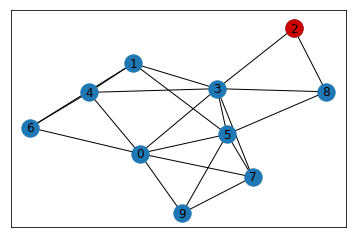

In [82]:
# Visualitzem el graf generat, acolorint en vermell els nodes amb grau
# més petit que m
deg_dist_less_m = [n[0] for n in g.degree() if n[1] < m]
nx.draw_networkx(g, pos=pos)
_ = nx.draw_networkx_nodes(g, pos=pos, nodelist=deg_dist_less_m, node_color='#cc0000')


La característica més coneguda del model de Barabási-Albert és que genera grafs amb una distribució de graus que segueix la llei de potència, de manera que la distribució de graus tendeix a aproximar-se a una recta quan es mostra en escala logarítmica:

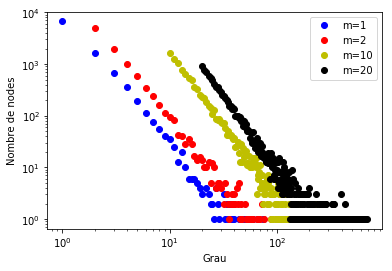

In [83]:
# Generem grafs amb 10K nodes i diferents valors de m
n, ms = 10000, [1, 2, 10, 20]
gs = [nx.barabasi_albert_graph(n, m, seed=None) for m in ms]

# Generem una gràfica amb la distribució de graus de cada
# un dels grafs generats
fig = plt.figure()
colors = ['bo', 'ro', 'yo', 'ko']
for i, g in enumerate(gs):
    degree_sequence = sorted([n[1] for n in nx.degree(g)], reverse=True)
    ctr_deg = Counter(degree_sequence)
    x, y = zip(*[(k, v) for k, v in ctr_deg.items()])
    plt.loglog(x, y, colors[i])
    
ms = ["m=1", "m=2", "m=10", "m=20"]
plt.legend(ms, numpoints=1)
plt.ylabel('Nombre de nodes')
plt.xlabel('Grau')
plt.show() 

Així, els grafs generats per aquest model tenen uns pocs nodes amb grau molt alt (els *hubs*), molt més gran que la mitjana del graf. Vegem-ho comparant el grau màxim de grafs amb el mateix nombre de nodes i arestes generats amb el model Barabási-Albert i amb el model del graf aleatori uniforme:

In [84]:
# Generem un graf amb 500 nodes amb el model Barabási-Albert
n, m_ba = 500, 10
g_ba = nx.barabasi_albert_graph(n=n, m=m_ba)

# Generem un graf amb 100 nodes i el mateix nombre d'arestes
# amb el model del graf aleatori uniforme.

num_edges = g_ba.number_of_edges()
g_gnm = nx.gnm_random_graph(n=n, m=num_edges)

# Comparem el grau màxim dels grafs generats.
ba_max_deg = max([n[1] for n in g_ba.degree()])
gnm_max_de = max([n[1] for n in g_gnm.degree()])

print("El grau màxim del graf generat amb Barabási-Albert és: {}".format(ba_max_deg))
print("El grau màxim del graf generat amb Erdős-Rényi és: {}".format(gnm_max_de))

El grau màxim del graf generat amb Barabási-Albert és: 108
El grau màxim del graf generat amb Erdős-Rényi és: 32


## 5. Detalls addicionals: reproductibilitat i grafs dirigits

Fins ara hem presentat els models de generació de grafs aleatoris (no dirigits) més populars. En aquesta secció veurem una característica comuna a tots ells, que ens permet crear codi reproduïble, així com també algunes variants dels models amb les quals podem crear grafs dirigits.

### 5.1 Reproductibilitat

Les funcions que hem vist fins ara permeten crear grafs aleatoris. Així, doncs, si les executem més d'una vegada amb els mateixos paràmetres, generalment retornen grafs diferents. De vegades, ens pot interessar poder tornar a generar un mateix graf diverses vegades (per exemple, per fer que el nostre codi sigui reproduïble). En aquest cas, podem utilitzar el paràmetre opcional `seed` per a fixar la llavor d'aleatorietat en la generació del graf:

In [85]:
n, m = 100, 50

# Generem dos grafs aleatoris gnm i els comparem
g1 = nx.gnm_random_graph(n=n, m=m)
g2 = nx.gnm_random_graph(n=n, m=m)
print("Els grafs generats són iguals: {}".format(g1.nodes == g2.nodes and g1.edges == g2.edges))

# Generem dos grafs aleatoris gnm utilitzant la mateixa llavor i els comparem
g3 = nx.gnm_random_graph(n=n, m=m, seed=42)
g4 = nx.gnm_random_graph(n=n, m=m, seed=42)
print("Els grafs generats són iguals: {}".format(g3.nodes == g4.nodes and g3.edges == g4.edges))

Els grafs generats són iguals: False
Els grafs generats són iguals: True


Totes les funcions de generació de grafs aleatoris que hem vist fins ara disposen d'aquest paràmetre opcional, que ens permet controlar la llavor del generador pseudoaleatori que s'utilitza per a generar el graf.
L'especificació de la llavor d'aleatorietat pot ser útil també, per exemple, per a veure l'evolució de la generació d'un graf amb el model Barabási-Albert: utilitzant la mateixa llavor i generant grafs amb diferent nombre de nodes, podem anar veient com es crea el graf, observant quin node s'afegeix en cada iteració i a quins altres nodes es connecta:

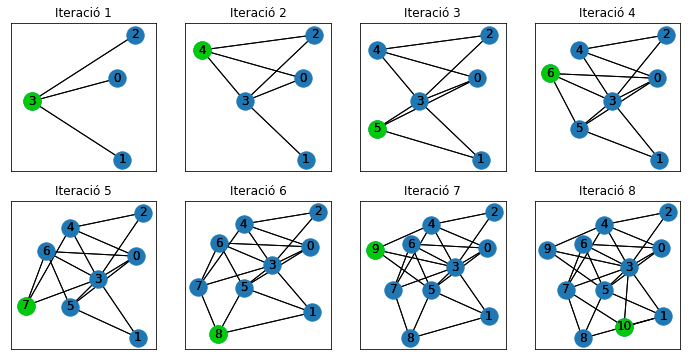

In [86]:
# Generem un graf aleatori amb 11 nodes, connectant cada nou node
# a 3 altres nodes ja existents
max_n, m = 12, 3
plt.figure(num=None, figsize=(12, 6))
# Calculem la posició final de tots els nodes del graf.
# (per visualitzar sempre cada node en la mateixa posició)
g = nx.barabasi_albert_graph(n=max_n, m=m, seed=45)
pos = nx.kamada_kawai_layout(g)
# Generem grafs de 4 a 11 nodes utilitzant una llavor fixada
for i, n in enumerate(range(4, 12)):
    ax = plt.subplot(2, 4, i+1)
    plt.title("Iteració {}".format(i+1))
    g = nx.barabasi_albert_graph(n=n, m=m, seed=45)
    nx.draw_networkx(g, pos=pos)
    # Mostrem el node que s'ha afegit a aquesta iteració en verd
    nx.draw_networkx(g, nodelist=[n-1], pos=pos, node_color='#00CA09')
    

Com podem observar, l'algorisme de generació s'inicialitza amb 3 nodes (0, 1 i 2) sense cap connexió. En la primera iteració, s'afegeix el node 3, que tindrà una aresta amb cadascun dels nodes ja existents. Després, s'afegeix el node 4, que es connecta als nodes 0, 2 i 3. En aquest cas, el node 3 era el que tenia més probabilitats de ser seleccionat com a veí, ja que tenia grau 3 (enfront dels nodes 0, 1 i 2 que tenien grau 1). Aquest comportament es va repetint durant l'execució de l'algorisme. Atès que els nodes amb més grau tenen més probabilitat de ser seleccionats com a veïns dels nous nodes, el model genera grafs que tenen hubs (nodes amb grau molt més alt que la resta). En l'exemple que acabem de generar, el node 3 té grau 9 al final de la generació (iteració 8), mentre que el segon node amb més grau té grau 6 (i correspon al node 5):

In [87]:
# Mostrem els graus dels nodes en la iteració 8
g.degree()

DegreeView({0: 4, 1: 4, 2: 2, 3: 9, 4: 5, 5: 6, 6: 4, 7: 5, 8: 3, 9: 3, 10: 3})

### 5.2 Grafs dirigits

Fins ara hem vist generadors de grafs aleatoris que permeten crear grafs **no dirigits**. Alguns dels generadors presentats disposen de variants capaces de generar també grafs dirigits.

Així, per exemple, la funció [`gnp_random_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html#networkx.generators.random_graphs.gnm_random_graph) té un paràmetre `directed` que permet especificar si volem generar un graf dirigit:

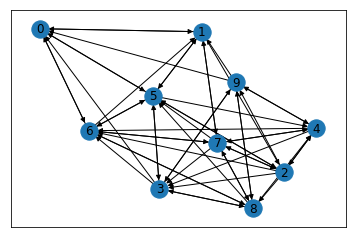

In [88]:
g = nx.gnp_random_graph(n=10, p=0.5, directed=True)
nx.draw_networkx(g)

L'algorisme de generació del graf és exactament el mateix, però en aquest cas per a cada parell de nodes hi ha dues possibles arestes per a generar (una en cada sentit). Això fa que el nombre de possibles arestes per a generar en crear el graf dirigit sigui el doble que en el cas del graf no dirigit i, per tant, el nombre de possibles grafs per a un nombre fixat de nodes i arestes augmenta. Vegem-ho amb l'exemple dels grafs de 4 nodes i 2 arestes:

In [89]:
# Generem grafs aleatoris dirigits i no dirigits de 4 nodes i 2 arestes
# i comparem el nombre de grafs existents

n, m = 4, 2

generated_graphs_nodir = generate_gnm_graphs(n=n, m=m, num_its=10000, directed=False)
generated_graphs_dir = generate_gnm_graphs(n=n, m=m, num_its=10000, directed=True)

print("El nombre de grafs no dirigits diferents generats de {} nodes i {} arestes és: {}"
      .format(n, m, len(generated_graphs_nodir.keys())))
print("El nombre de grafs dirigits diferents generats de {} nodes i {} arestes és: {}"
      .format(n, m, len(generated_graphs_dir.keys())))

El nombre de grafs no dirigits diferents generats de 4 nodes i 2 arestes és: 15
El nombre de grafs dirigits diferents generats de 4 nodes i 2 arestes és: 66


In [90]:
# Creem una funció que calculi el nombre de grafs dirigits
# existents de n nodes i m arestes utilitzant la fórmula amb els coeficients binomiales
# (el nombre d'arestes es multiplica per 2 respecte al cas no dirigit).
def num_existing_directed_graphs(n, m):
    return binomial_coefficient(2*binomial_coefficient(n, 2), m)

# Calculem el nombre de grafs dirigits i no dirigits de 4 nodes i 2 arestes
num_graphs_nodir = num_existing_graphs(n, m)
num_graphs_dir = num_existing_directed_graphs(n, m)

print("El nombre de grafs no dirigits diferents que hi ha de {} nodes i {} arestes és: {}"
      .format(n, m, num_graphs_nodir))
print("El nombre de grafs dirigits diferents que hi ha de {} nodes i {} arestes és: {}"
      .format(n, m, num_graphs_dir))

El nombre de grafs no dirigits diferents que hi ha de 4 nodes i 2 arestes és: 15
El nombre de grafs dirigits diferents que hi ha de 4 nodes i 2 arestes és: 66


## 6. Altres generadors de grafs

Els generadors de grafs que hem vist fins ara permeten generar grafs de manera aleatòria. Networkx també disposa de funcions de creació de grafs deterministes, que ens faciliten generar grafs concrets que vulguem usar en els nostres codis.

Algunes d'aquestes funcions permeten carregar grafs de xarxes reals que són usats àmpliament per la comunitat d'anàlisi de dades de xarxes socials. Per exemple, ja hem vist en notebooks anteriors que podíem carregar el graf del club de karate de Zacarías directament usant la funció [`karate_club_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html):


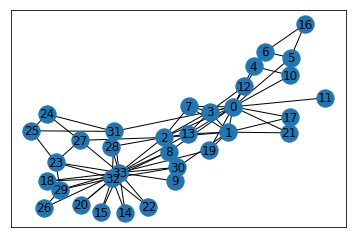

In [91]:
# Carreguem i visualitzem el graf del club de karate
g = nx.karate_club_graph()
nx.draw_networkx(g)

A més del graf del club de karate, també disposem de funcions per q carregar altres grafs populars en l'anàlisi de xarxes socials: les funcions  [`davis_southern_women_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.davis_southern_women_graph.html#networkx.generators.social.davis_southern_women_graph), [`florentine_families_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.florentine_families_graph.html#networkx.generators.social.florentine_families_graph) i, [`les_miserables_graph`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html#networkx.generators.social.les_miserables_graph) es poden utilitzar de manera anàloga a la del club de karate.

Networkx també disposa de generadors per a alguns grafs *clàssics*, que tenen propietats que els defineixen:

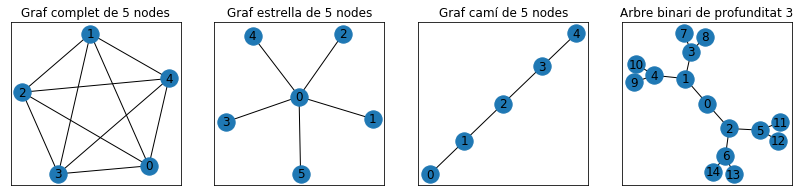

In [92]:
# Generem 4 grafs clàssics i els visualitzem
plt.figure(num=None, figsize=(14, 3))

ax = plt.subplot(1, 4, 1)  
plt.title("Graf complet de 5 nodes")
g = nx.classic.complete_graph(5)
nx.draw_networkx(g)

ax = plt.subplot(1, 4, 2)  
plt.title("Graf estrella de 5 nodes")
g = nx.classic.star_graph(5)
nx.draw_networkx(g)

ax = plt.subplot(1, 4, 3)  
plt.title("Graf camí de 5 nodes")
g = nx.classic.path_graph(5)
nx.draw_networkx(g)

ax = plt.subplot(1, 4, 4) 
plt.title("Arbre binari de profunditat 3")
g = nx.classic.balanced_tree(2, 3)
nx.draw_networkx(g)

Networkx també disposa de generadors de grafs que, per les seves característiques, tenen fins i tot un nom que els identifica:

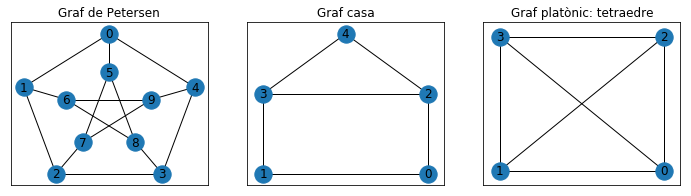

In [94]:
# Generem 3 grafs amb nom i els visualitzem, especificant les posicions dels
# nodes manualment, per a facilitar-ne la identificació
plt.figure(num=None, figsize=(12, 3))

ax = plt.subplot(1, 3, 1)  
plt.title("Graf de Petersen")
g = nx.small.petersen_graph()
pos = {0: [0, 1.0], 1: [-0.95, 0.31], 2: [-0.59, -0.81], 3: [0.59, -0.81], 4: [0.95, 0.31], 
       5: [0, 0.5], 6: [-0.48, 0.15], 7: [-0.29, -0.40], 8: [0.29, -0.40], 9: [0.47, 0.15]}
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 2)  
plt.title("Graf casa")
g = nx.small.house_graph()
pos = {0: [1, 0], 1: [0, 0], 2: [1, 1], 3: [0, 1], 4: [0.5, 1.75]}
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 3)
plt.title("Graf platònic: tetraedre")
g = nx.tetrahedral_graph()
pos = {0: [1, 0], 1: [0, 0], 2: [1, 1], 3: [0, 1]}
nx.draw_networkx(g, pos=pos)